# Read images and compute different color embeddings

In [1]:
import os
import json

DATASETS_FOLDER = '..\..\..'
MARKUP_JSON = os.path.join(DATASETS_FOLDER, 'merged_markup.json')

with open(MARKUP_JSON) as f:
    markup_data = json.load(f)

img_paths = []
for dataset_part in markup_data.keys():
        markup = markup_data[dataset_part]
        img_paths.extend(
            [
                os.path.join(DATASETS_FOLDER, dataset_part, img_name)
                for img_name in markup.keys()
            ]
        )

In [2]:
import sys
sys.path.append('..')

from src.render import show_examples, segment_moto_on_image
from src import Processing

DATASET_PART_FOLDER = r"C:\Users\Ася\Desktop\Папки\Учёба\project_FotoMoto\8.06(2)MOTORING_25.06.22 JPG"

processor = Processing(DATASET_PART_FOLDER)

segment_results, matched_moto_to_pilots, image = processor.get_moto_masks_on_image(img_paths[0])

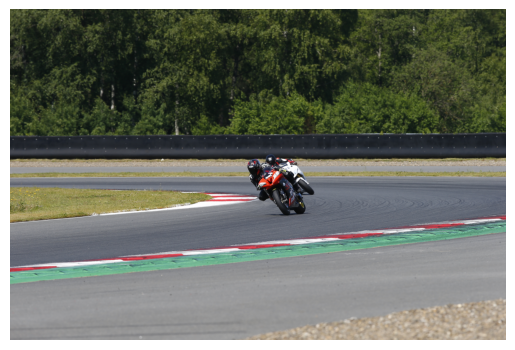

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.axis('off')
plt.imshow(image)
plt.show()

In [4]:
processed_masks, _ = processor.get_processed_masks_on_image(img_paths[0])
len(processed_masks)

2

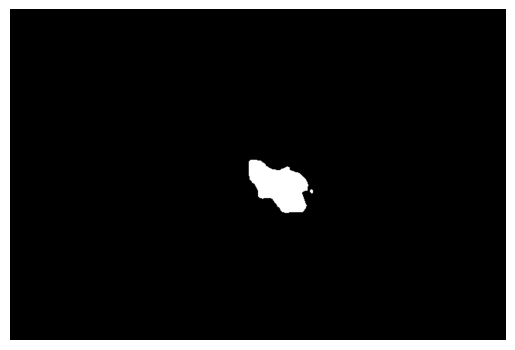

In [5]:
plt.axis('off')
plt.imshow(processed_masks[0])
plt.show()

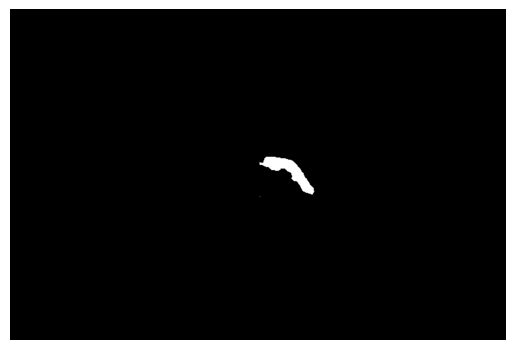

In [6]:
plt.axis('off')
plt.imshow(processed_masks[1])
plt.show()

## Separate channels

In [7]:
import numpy as np
import cv2

def plot_mask_histograms_by_separate_channels(
    rgb_img, moto_mask, hsv_flag=True,
    intervals_count=256
):
    image = rgb_img.copy()
    if hsv_flag:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        
    _, _, channels = image.shape
    
    for channel_id in range(channels):
        H, bins = np.histogram(
            image[:, :, channel_id], bins=intervals_count, range=(0,255),
            density=False, weights=moto_mask[:, :, channel_id]
        )
        plt.bar(bins[:-1],H,width=1)
        plt.title(f'Color histogram for {"RGB"[channel_id] if not hsv_flag else "HSV"[channel_id]} channel')
        plt.show()


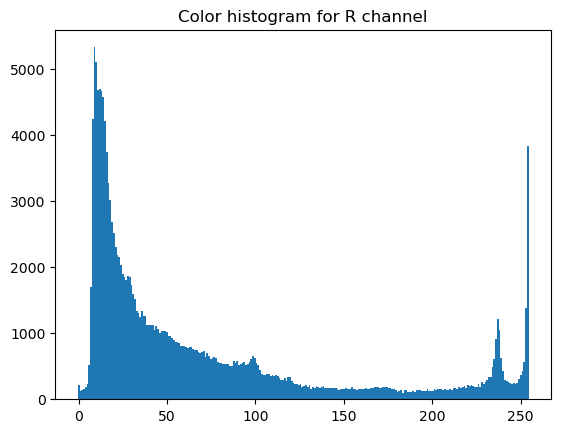

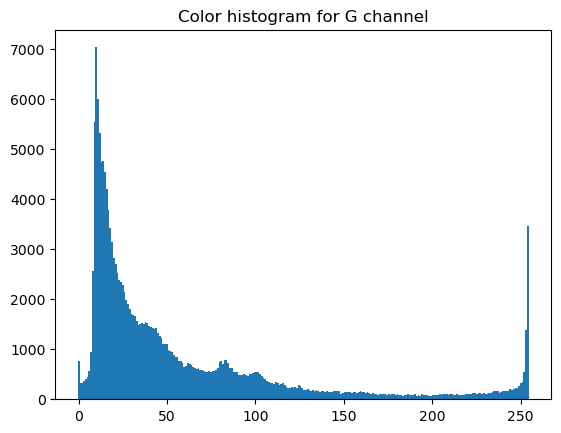

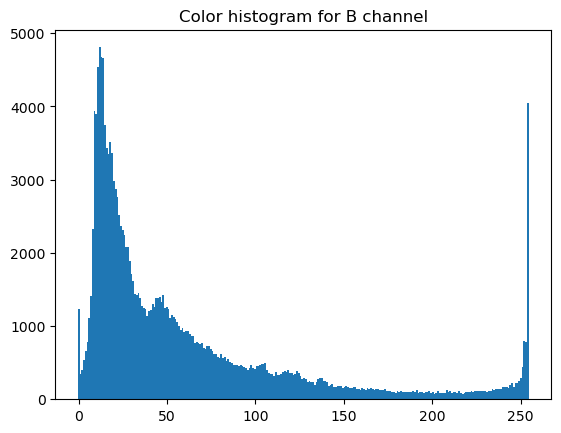

In [8]:
plot_mask_histograms_by_separate_channels(image, processed_masks[0], hsv_flag=False)

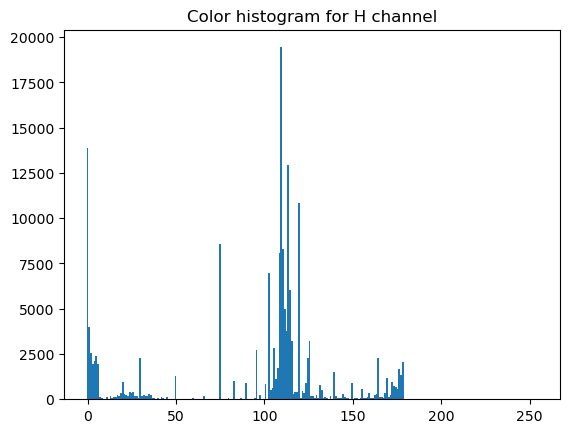

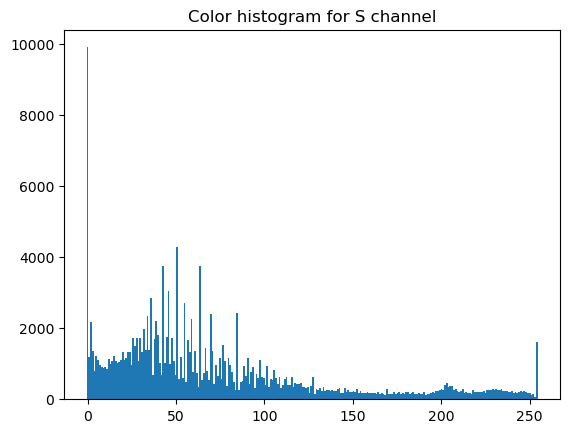

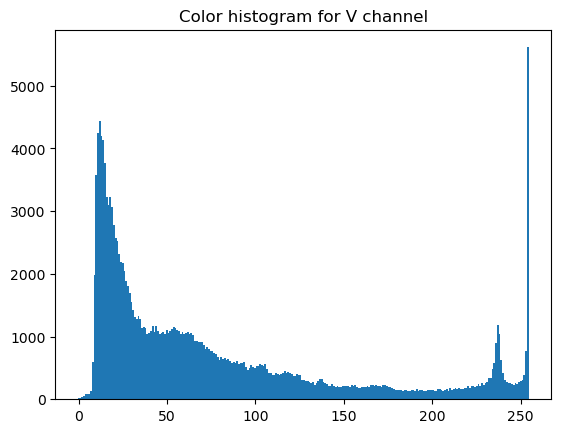

In [9]:
plot_mask_histograms_by_separate_channels(image, processed_masks[0], hsv_flag=True)

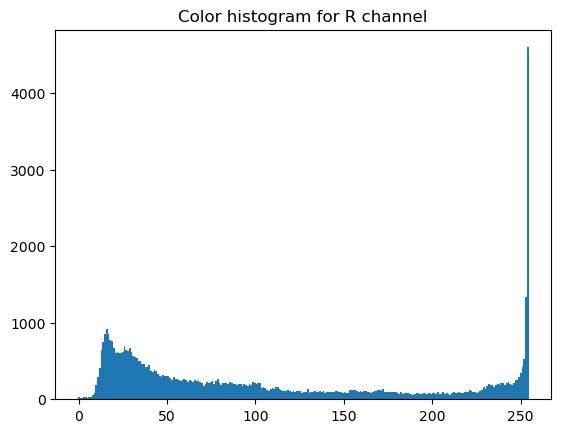

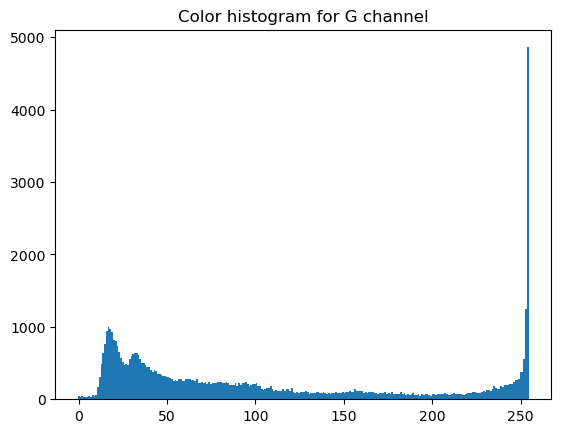

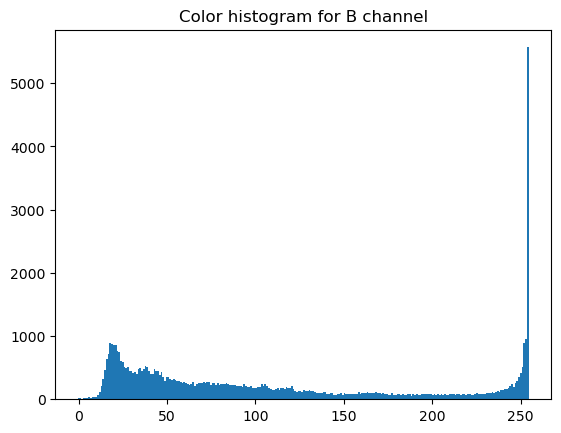

In [10]:
plot_mask_histograms_by_separate_channels(image, processed_masks[1], hsv_flag=False)

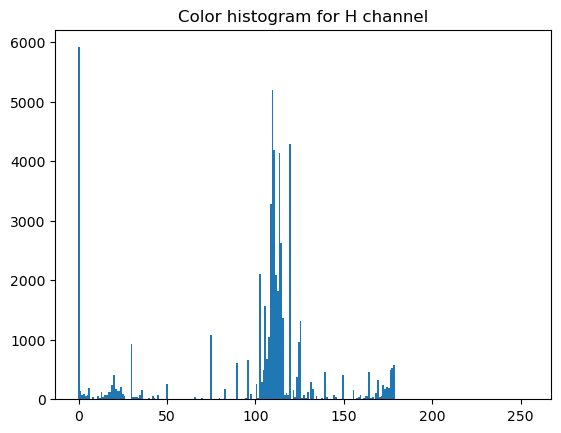

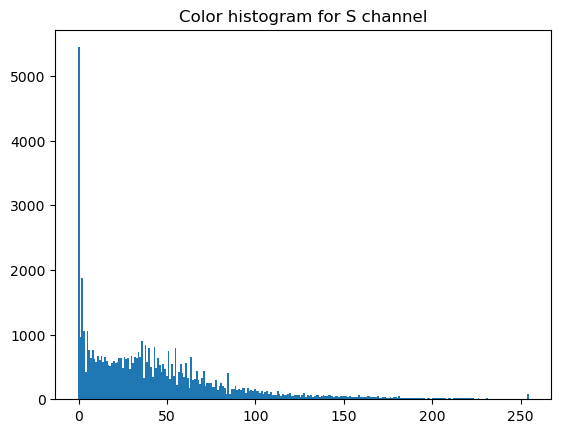

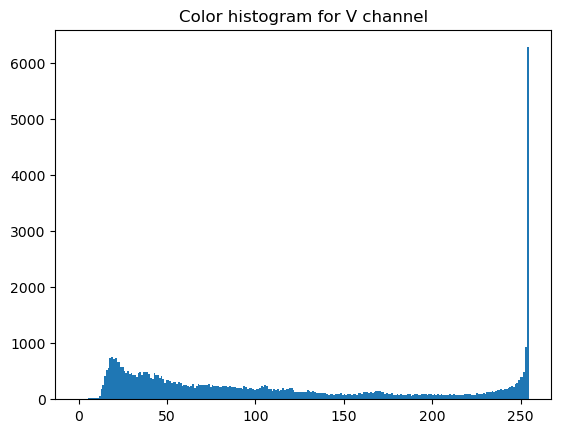

In [11]:
plot_mask_histograms_by_separate_channels(image, processed_masks[1], hsv_flag=True)

## All channels together

In [12]:
import matplotlib

def plot_mask_histograms_by_union_channels(
    rgb_img, moto_mask, hsv_flag=True,
    out_color_dim=16, input_color_dim=256,
):
    image = rgb_img.copy()
    if hsv_flag:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        
    _, _, channels = image.shape
    
    divider = input_color_dim // out_color_dim
    image = np.floor(np.divide(image, divider).astype(int))
    
    pos = []

    for idx in range(channels):
        args = np.argwhere(moto_mask[:, :, idx])
        pos.append(image[args[:, 0], args[:, 1], idx].astype(np.float32).reshape(-1))
    
    encoded_triplets_arr = pos[0] * out_color_dim ** 2 + pos[1] * out_color_dim + pos[2]
    emb_dim = out_color_dim ** 3
    
    pixels_in_mask = moto_mask[:, :, 0].sum()

    H, bins = np.histogram(
        encoded_triplets_arr, bins=emb_dim-1, range=(0,emb_dim-1),
        density=False
    )
    plt.bar(bins[:-1],H,width=1)
    plt.title(f'Color histogram for {"RGB" if not hsv_flag else "HSV"} with union channels: out color dim = {out_color_dim}')
    plt.show()
    
    color_embedding = H.astype(np.float32) / pixels_in_mask
        
    return color_embedding


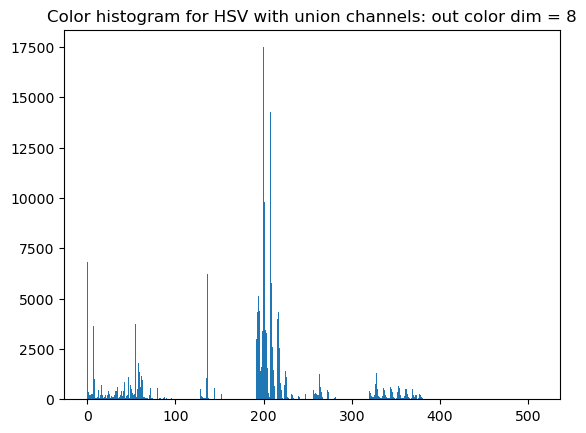

In [13]:
plot_mask_histograms_by_union_channels(image, processed_masks[0], hsv_flag=True, out_color_dim=8);

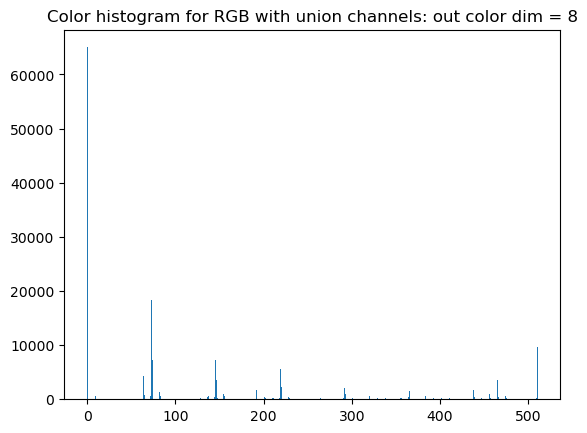

In [14]:
plot_mask_histograms_by_union_channels(image, processed_masks[0], hsv_flag=False, out_color_dim=8);

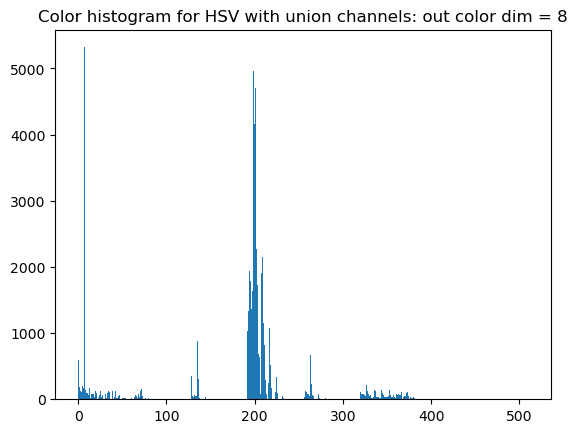

In [15]:
plot_mask_histograms_by_union_channels(image, processed_masks[1], hsv_flag=True, out_color_dim=8);

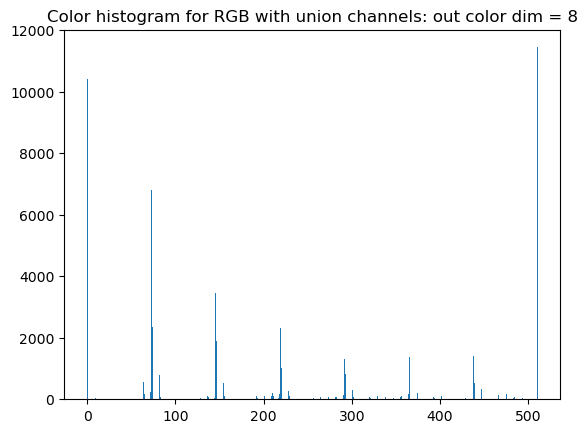

In [16]:
plot_mask_histograms_by_union_channels(image, processed_masks[1], hsv_flag=False, out_color_dim=8);

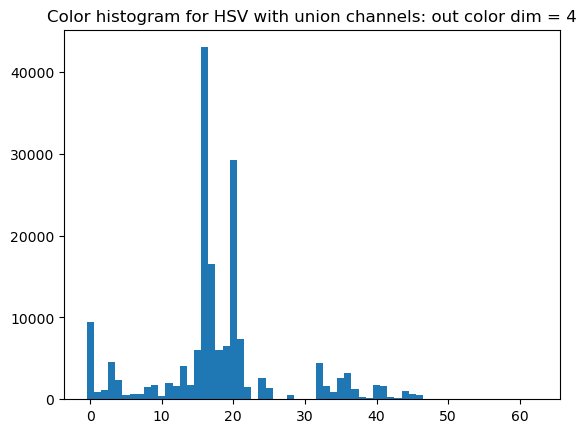

In [17]:
plot_mask_histograms_by_union_channels(image, processed_masks[0], hsv_flag=True, out_color_dim=4);

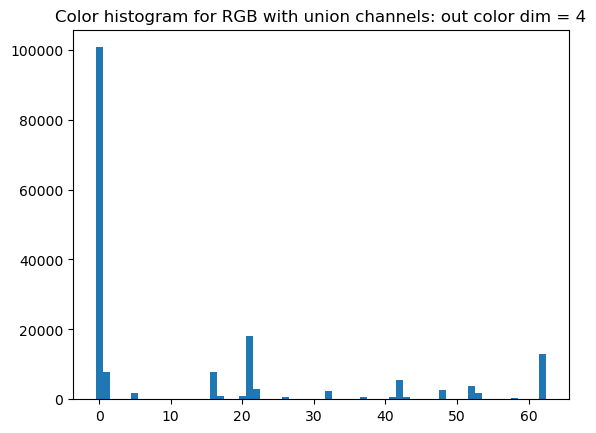

In [18]:
plot_mask_histograms_by_union_channels(image, processed_masks[0], hsv_flag=False, out_color_dim=4);